In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# A Problem of minimizing the $l_1$ norm

### Mohsin Javed, June 01, 2019

Given vectors $v, w$ in $\mathbf{R}^n$, find $\alpha \in \mathbf{R}$ such that $\|\alpha v - w \|_1$ is minimized.

Recall that
\begin{equation}
\|\alpha v - w \|_1 = \sum_{i=1}^{n}|\alpha v_i - w_i|, \qquad i = 1, 2, \ldots, n.
\end{equation}

Let us explore the structure of the problem for $n=4$.

In [103]:
n = 20
v = np.random.randint(-20, 20, n)
w = np.random.randint(-20, 20, n)
#v = np.array([-8, -1, 1, 8])
#w = np.array([ -9,  16, -20, -12])

We now pick a range of $\alpha$ and compute and plot the $l_1$-norm.

In [104]:
alpha = np.arange(-25, 25, .05)
l1_norm = list(map(lambda a: np.linalg.norm(a*v - w, 1), alpha))

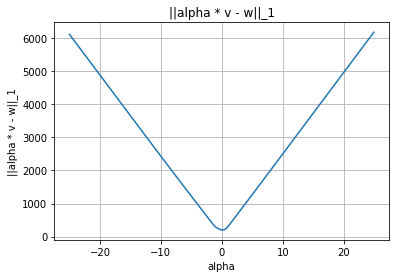

In [105]:
plt.plot(alpha, l1_norm)
plt.grid(True)
plt.title('||alpha * v - w||_1')
plt.xlabel('alpha')
plt.ylabel('||alpha * v - w||_1');

Clearly for large enough $\alpha$, the function is increasing and linear. In fact, the function has the slope $\|v\|_1$ for large positive $\alpha$. This is true because for large positive $\alpha$, the term 
$\alpha v_i - w_i$ has the same sign as the sign of $v_i$. Hence in this case, the net coefficient of $\alpha$ in the smmation $\sum_{i=1}^{n} |\alpha v_i - w_i|$ is $\|v\|_1$. Similarly, for sufficiently negative $\alpha$, the functon is decreasing, linear and has slope $-\|v\|_1$. The slope of the norm changes from $-\|v\|_1$ to $\|v\|_1$, therefore, the function must have a minimum in between. 

The simplest case to solve is when $n=1$. This one dimentional problem is trivial. The function $\|\alpha v - w\|_1$ has a minimum at $\alpha^* = \frac{w}{v}$. For $n=2$, the function $\|\alpha v - w\|_1$ has a minimum contained in the interval formed by the minimum and the maximum of the set $\{w_1/v_1, w_2/v_2\}$. 

The general solution can now be outlined. Find the numbers $a$ and $b$, such that:
\begin{align}
a &= \min \{w_i/v_i: i = 1, 2, \ldots, n\}\\
b &= \max \{w_i/v_i: i = 1, 2, \ldots, n\}
\end{align}

The minimum of the $l_1$-norm lies in the interval $[a, b]$.

In [106]:
a = np.min(w/v)
b = np.max(w/v)
[a, b]

[-14.0, 4.5]

To find the minimum, we argue as follows. The function defining the $l_1$ norm is a sum of absolute value functions, hence continuous and piecewise differentiable. The minimum must lie on one of the _boundary_ points:
\begin{equation}
\alpha^* = argmin \{\|\alpha v - w\|_1\big{|}_{\alpha = w_i/v_i}: i = 1, 2, \ldots, n \}
\end{equation}

In [113]:
critical_points = sorted([w_i/v_i for (w_i, v_i) in zip(w, v)])
critical_points

[-14.0,
 -8.0,
 -2.0,
 -1.4545454545454546,
 -1.375,
 -1.1333333333333333,
 -1.0666666666666667,
 -1.0555555555555556,
 -0.29411764705882354,
 -0.18181818181818182,
 -0.15789473684210525,
 0.1875,
 0.3333333333333333,
 0.4,
 0.6666666666666666,
 0.6923076923076923,
 0.7,
 0.8888888888888888,
 1.1666666666666667,
 4.5]

In [114]:
norm_values = list(map(lambda a: np.linalg.norm(a*v - w, 1), critical_points))
norm_values

[3406.0,
 1942.0,
 502.0,
 372.1818181818182,
 355.0,
 306.6666666666666,
 295.3333333333333,
 293.77777777777777,
 214.58823529411768,
 206.72727272727272,
 205.57894736842107,
 202.125,
 205.33333333333331,
 209.20000000000002,
 235.33333333333337,
 238.76923076923077,
 239.99999999999997,
 277.77777777777777,
 338.3333333333333,
 1145.0]

In [115]:
alpha_star = critical_points[np.argmin(norm_values)]
f_min = norm_values[np.argmin(norm_values)]
alpha_star

0.1875

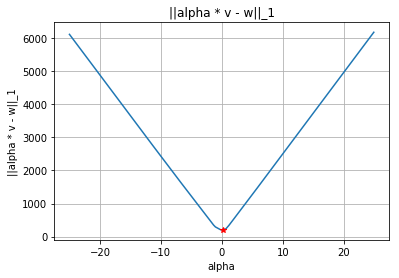

In [111]:
plt.plot(alpha, l1_norm)
plt.plot(alpha_star, f_min, 'r*')
plt.grid(True)
plt.title('||alpha * v - w||_1')
plt.xlabel('alpha')
plt.ylabel('||alpha * v - w||_1');
plt.plot();